In [1]:
import torch
from d2l import torch as d2l
from torch import nn

import wandb

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [2]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)


net.apply(init_weights);

In [3]:
loss = nn.CrossEntropyLoss(reduction='none')

In [4]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

RuntimeError: grad can be implicitly created only for scalar outputs

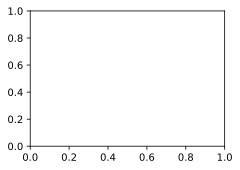

In [5]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
wandb.log({"loss": loss})

# Optional
wandb.watch(net, log='all')